In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import lmfit as lf
import os
import seaborn as sns

sns.set_context('paper') # makes text larger (poster) or smaller (paper)

from lmfit.models import DampedOscillatorModel

In [2]:
"""Import files from Folder"""

## Mac vs Windows
#base = '/Volumes/Aleman-Lab/Group/Projects/GrapheneCoupledResonators/Data/Sample2/ResonanceCurves/'
#savefolder = '/Volumes/Aleman-Lab/Group/Papers and Abstracts/Coupled Resonator Spatial Imaging/Figures/python_exports/'
base = r'\\cas-fs1.uoregon.edu\Material-Science-Institute\Aleman-Lab\Group\Projects\GrapheneCoupledResonators\Data\Sample2\ResonanceCurves'
savefolder = r'\\cas-fs1.uoregon.edu\Material-Science-Institute\Aleman-Lab\Group\Papers and Abstracts\Coupled Resonator Spatial Imaging\Figures\python_exports'

path = os.path.join(base, 'Array01.00r0.5p3Device0.0Drum1_2','Data.csv')

Text(0.5, 1.0, 'Response Curve')

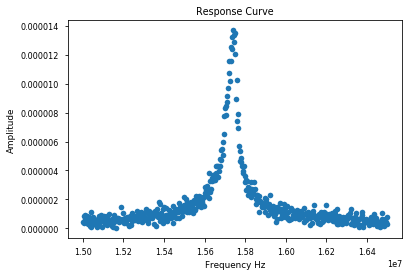

In [3]:
"""Define column names and plot response curve"""


colnames = ['SweepVal', 'F', 'R', 'theta', 'NEP_BW', 'R_ref', 'theta_ref', 'Amp', 'Phase']

df = pd.read_csv(path, names = colnames)

fig, ax = plt.subplots()
ax.plot(df.F, df.R, 'o')

ax.set_xlabel('Frequency Hz')
ax.set_ylabel('Amplitude')
ax.set_title('Response Curve')

In [4]:
"""Find resonant frequency and normalize F and R^2 values"""


maxR = df['R'].max()
maxFreqIn = (df['R'].idxmax())

df['Rnorm'] = (df.R) / (maxR)
df['Fnorm'] = df.F / 10**6

res = df['Fnorm'].values[maxFreqIn]

In [5]:
"""Define Model"""


model = DampedOscillatorModel()

model.param_names

['amplitude', 'center', 'sigma']

[[Model]]
    Model(damped_oscillator)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 38
    # data points      = 500
    # variables        = 3
    chi-square         = 0.49057225
    reduced chi-square = 9.8707e-04
    Akaike info crit   = -3457.39540
    Bayesian info crit = -3444.75158
[[Variables]]
    amplitude:  0.00262682 +/- 3.2061e-05 (1.22%) (init = 6.35345e-05)
    center:     15.7344337 +/- 4.1184e-04 (0.00%) (init = 15.73948)
    sigma:      0.00135019 +/- 2.6667e-05 (1.98%) (init = 0.0005)
    height:     0.97275742 +/- 0.01158454 (1.19%) == '0.5000000*amplitude/max(2.220446049250313e-16, sigma)'
    fwhm:       0.07359350 +/- 0.00145355 (1.98%) == 'sqrt(abs(center**2*(1-2*sigma**2)+(2*sqrt(center**4*sigma**2*(sigma**2+3)))))-sqrt(abs(center**2*(1-2*sigma**2)-(2*sqrt(center**4*sigma**2*(sigma**2+3)))))'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) =  0.824


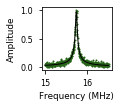

In [6]:
"""Fit data with Damped Oscillator Model"""


guessQ = 1000

params = model.make_params(sigma = 1/(2*guessQ), center = res, amplitude = 1 / (guessQ*res))

result = model.fit(df.Rnorm, params, x = df.Fnorm)

fig, ax = plt.subplots(figsize=(1.25,1.15))
sty = {'markersize':4, "lw":1}
ax.plot(df.Fnorm, df.Rnorm, '.', color='#276419' , **sty )
ax.plot(df.Fnorm, result.best_fit, '-k', **sty)

ax.set_xlabel('Frequency (MHz)')
ax.set_ylabel('Amplitude')
#ax.set_title('Response Curve')

fig.savefig(os.path.join(savefolder,'ResonanceCurveAndFit.pdf'), bbox_inches= 'tight', pad_inches=0.05)

print(result.fit_report())

In [7]:
"""Caluculate Quality Factor"""


Q = 1/(2*result.params['sigma'].value)

Q1 = result.params['center'].value/(result.params['fwhm'].value)

print(Q, Q1)

370.3176137322335 213.801934587851


In [8]:
print (result.params['fwhm'].value, 2*result.params['sigma'].value)

0.07359350473862492 0.0027003846506827855
